# HWK4 Part 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### a) Download the CIFAR dataset (train and test set) and figure out what are the various sizes (number of images, number of channels and number of pixels).

In [13]:
train_data = torch.load('../../data/cifar/train_data.pt')
test_data = torch.load('../../data/cifar/test_data.pt')

train_label = torch.load('../../data/cifar/train_label.pt')
test_label = torch.load('../../data/cifar/test_label.pt')

print(train_data.size())
print(test_data.size())

torch.Size([50000, 3, 32, 32])
torch.Size([10000, 3, 32, 32])


### b) Make a three-layer net with a softmax at the end:
$$ \text{Linear1} \rightarrow \text{ReLU} \rightarrow  \text{Linear2} \rightarrow \text{ReLU} \rightarrow 
\text{Linear3} \rightarrow 
\text{Softmax}   $$
### Each of the hidden layers should have size = 50.
### Carefully pick the dimension for the Softmax so that your network can process batches.

In [14]:
class three_layer_net(nn.Module):

    def __init__(self, input_size, hidden_size1, hidden_size2,  output_size):
        super().__init__()

        self.layer1 = nn.Linear( input_size, hidden_size1 , bias=False)
        self.layer2 = nn.Linear( hidden_size1, hidden_size2 , bias=False)   
        self.layer3 = nn.Linear( hidden_size2, output_size , bias=False)
        
    def forward(self, x):
        
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        p = F.softmax(x,dim=1)
        
        return p
    
    
net= three_layer_net(3072,50,50,10)
print(net)

three_layer_net(
  (layer1): Linear(in_features=3072, out_features=50, bias=False)
  (layer2): Linear(in_features=50, out_features=50, bias=False)
  (layer3): Linear(in_features=50, out_features=10, bias=False)
)


### c) Take a random image from the test set (using the randint() python function), and display it using the utils.show() function.

### Then feed this image to the net (remeber that it needs to be considered as a batch of one image -- from now on we ONLY PROCESS BATCH OF IMAGES).

### Then display the confidence scores given by our untrained network using the utils.show_prob_cifar() functions.

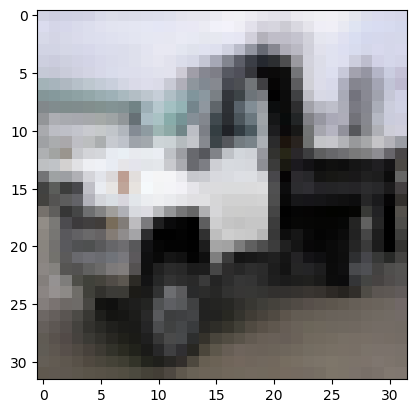

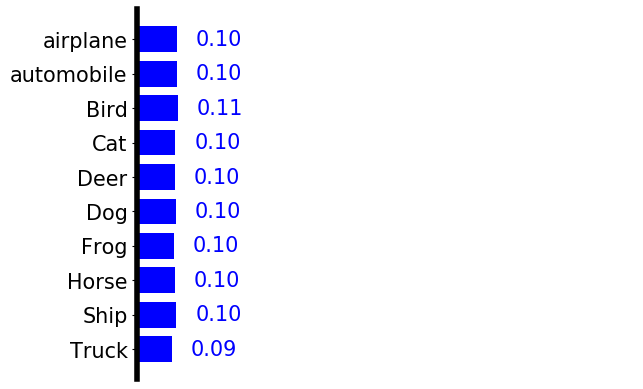

In [15]:
idx = randint(0,10000-1)
im = test_data[idx]

utils.show(im)

p = net(im.view(1,3072))

utils.show_prob_cifar(p)

### d) Train the network. Use batch size = 200 and do 10,000 iterations (it will take a minute or so).

In [16]:
bs= 200

# ignore this:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,10000):
    
    indices = torch.randint( 0,50000 , size=(bs,) )
    minibatch_data = train_data[indices]
    minibatch_label = train_label[indices]
    
    inputs = minibatch_data.view(bs,3072)
 
    prob = net( inputs ) 
    
    # ignore all this
    log_prob=torch.log(prob)
    loss = criterion(log_prob, minibatch_label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()
    

### e) Take a random image from the test set, display it, feed it to the net, and display the confidence scores (as in part c)). How is the network doing? Not great?

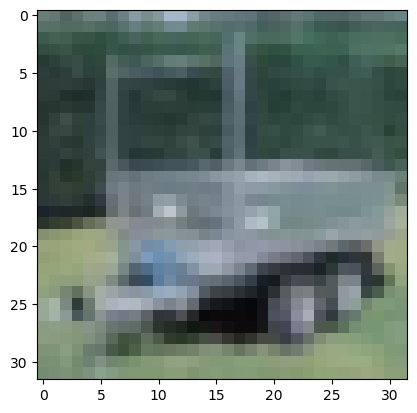

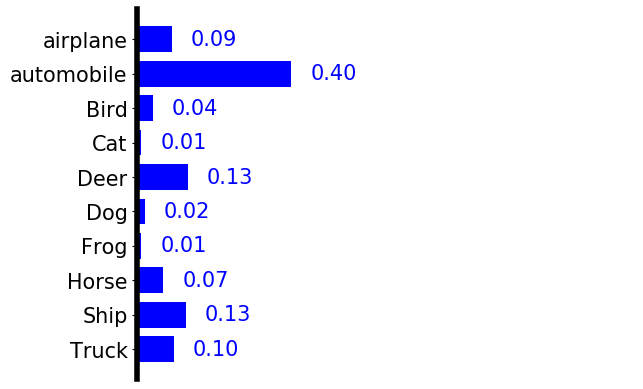

In [24]:
idx = randint(0,10000-1)
im = test_data[idx]

utils.show(im)

p = net(im.view(1,3072))

utils.show_prob_cifar(p)

# f) There are a few categories on which the network does quite well, which ones? Complete the markdown cell below. Does it make sense?

tells the difference between object and animals